Part 1:

In [1]:
# Logistic Regressions are for classification problems
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/kqmbui/Desktop/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

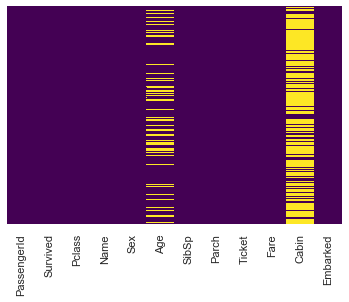

In [5]:
# Every tan tick mark is a null value
# Looks like we're missing a lot of entries for age and cabin
# Age is workable, so just use mean imputation later to fill NA
# Cabin has too many missing values, so drop NA later
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

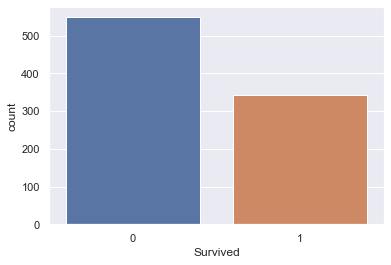

In [6]:
# 0 = dead, 1 = survived
sns.countplot(x='Survived',data=train)

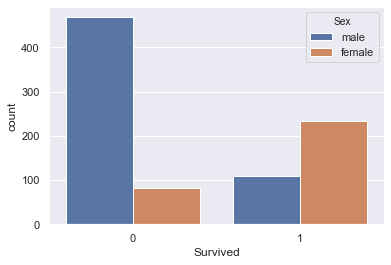

In [7]:
# Looks like more males did not survive moreso than females
sns.countplot(x='Survived',data=train,hue='Sex')

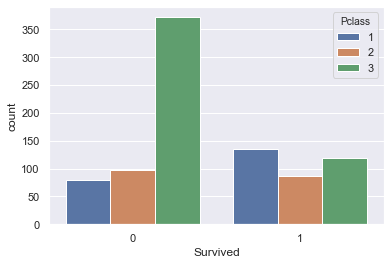

In [8]:
# Looks like most of the people in 3rd class died
# More people in the 1st class survived
sns.countplot(x='Survived',data=train,hue='Pclass')

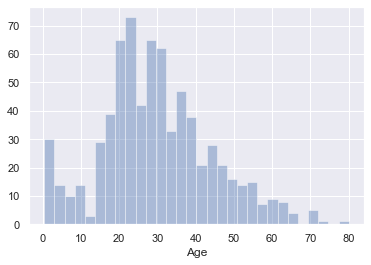

In [9]:
# Use dropna() to drop the missing values in the Age (177 null values)
# Plots won't work otherwise
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
# Looks like more younger people were on board the titanic

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


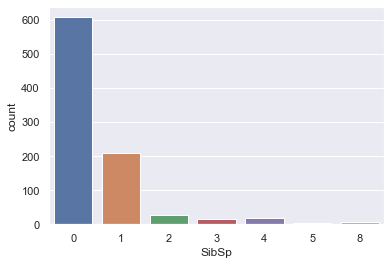

In [11]:
# Looks like most people DID NOT have children or spouses onboard too.
sns.countplot(x='SibSp',data=train)

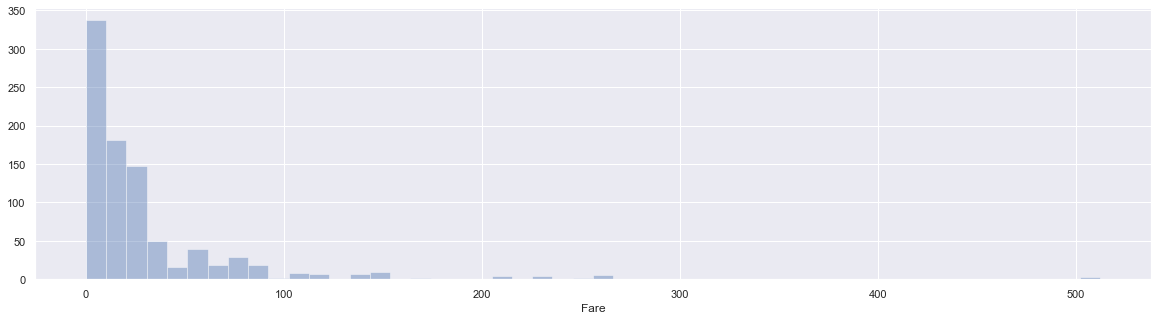

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(train['Fare'],kde=False)

In [13]:
# If you want to use some interactive figures. Cufflinks refresher!
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist',bins=50)

Part 2:

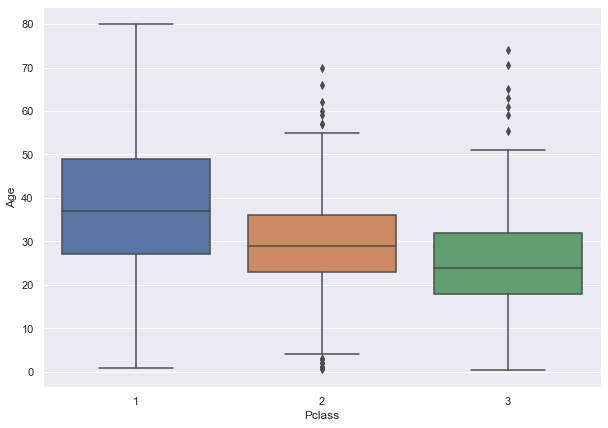

In [15]:
# Time to start cleaning the data for Age column using mean imputation.
# train[train['Pclass']==1]['Age'].mean()
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [16]:
# Using mean imputation to deal with missing values
def impute_age(cols):
    Age = cols[0] # First item in list below "train[['Age','Pclass']]"
    Pclass = cols[1] # Second item in list below"train[['Age','Pclass']]"
    
    if pd.isnull(Age): # Affects people with null values in age column
        # Found the mean 'Age' for each 'Pclass' using the boxplot above
        if Pclass == 1:
            return 37 # 37 is mean of 1st class people in Pclass column
        elif Pclass == 2:
            return 29 # 29 is mean of 2nd class people in Pclass column
        else:
            return 24 # 24 is mean of 3rd class people in Pclass column
    else:
        return Age # Returns age of non-missing values

In [17]:
# Applied the impute_age function we created to all columns, axis=1
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

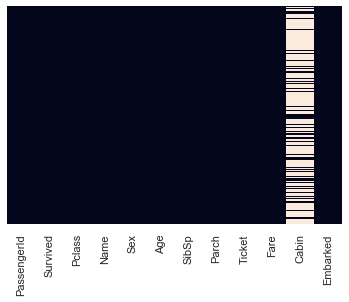

In [18]:
# From the plot, looks like we successfully filled the NaN values for age
# Now, time to drop cabin column since there's too many missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [19]:
# Dropping cabin column...
train.drop('Cabin',axis=1,inplace=True)

In [20]:
# Successfully dropped cabin column
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


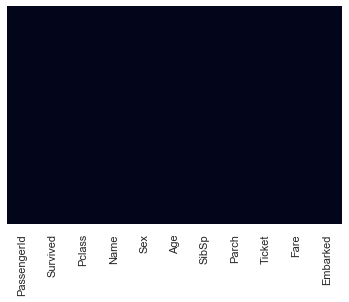

In [21]:
# Completely cleaned dataset!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [22]:
# Before creating our first logistical regression, we must apply a dummy
# variable to a string value since a machine learning algorithm won't
# because able to recognize, for example, 'male' and 'female.' Instead,
# you must apply a number to these string values. For example, male=0 and
# female=1.

In [23]:
# This converts categorical variables into dummy/indicator variables.
pd.get_dummies(train['Sex'])
# If machine learning algorithm gets fed both gender columns like this, one column would be a perfect predictor for the other.
# This is also known as multi-collinearity, which is not good.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
# To avoid multi-collinerity, we can just drop one of the columns
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
# Also avoids multi-collinearity with more than 2 categorical variables
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
# Adding the dummy variables we created to the train dataframe
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
# Dropping columns we're not going to use much. So, the categorical variables we used to make the dummy variables and others.
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
# As a reminder: 'male', 'Q', and 'S' are the dummy variables
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
# Dropping 'PassengerId' since it's just a normal index that starts at 1.
# Not really useful in predicting whether passengers survived or not.
train.drop('PassengerId',axis=1,inplace=True)

In [30]:
#Survived: 0 is dead, 1 is alive
#Pclass: 1st, 2nd, and 3rd class (pretty much same as 'Embarked' column)
#Age: Passenger's age
#SibSp: How many siblings or spouses passenger had on board too
#Parch: How many parents or siblings passenger had on board too
#Fare: How much passenger paid for their ticket
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Part 3:

In [31]:
# Time to actually train and test our logistic regression model!
# The goal is to predict whether a passenger survived or not
X = train.drop('Survived',axis=1) # Everything but the 'Survived' column
y = train['Survived'] # Target column

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train,y_train)

/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
# Useful task that gives summary report on classifcation model
# Sadly, there's no regression summary report for sklearn
from sklearn.metrics import classification_report

In [39]:
# precision: same as logmodel.score(X_test,y_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [40]:
# You can also call a confusion matrix if you prefer looking at that
from sklearn.metrics import confusion_matrix

In [41]:
# True Positive=133,False Positive=21,False Negative=40,True Negative=74
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 40,  74]])

Statsmodel Method

In [42]:
# Importing statsmodel
import statsmodels.api as sm

In [43]:
model = sm.Logit(y,sm.add_constant(X)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.438917
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3409
Time:                        13:12:12   Log-Likelihood:                -391.07
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.035e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5448      0.590      9.391      0.000       4.388       6.702
Pclass        -1.1811      0.

/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Odds ratio of logistic regression is the exponentiated coefficient. 
<br>
Interpretation:
<br>
For a discrete variable like gender, being a male leads to a .065 fold increase in dying, so less likely to die.
<br>
For a continuous variable like age, a unit increase leads to a .958 fold increase in dying.

In [63]:
odds_ratio = np.exp(model.params)
pd.DataFrame(odds_ratio,X.columns,['Odds Ratio'])

,Odds Ratio
Pclass,0.306952
Age,0.958066
SibSp,0.711832
Parch,0.915285
Fare,1.001755
male,0.065033
Q,0.881738
S,0.671903


Probability, which is i/(1+i) for i is equal to odds ratio. So, if you embarked in 'Q,' you had a 46.8576% of dying. You can find probability of living with 1-(probability of dying).

In [45]:
probability = []
for i in odds_ratio:
    probability.append((i/(1+i)))

In [64]:
pd.DataFrame(probability[1:],X.columns,['Death Probability'])

,Death Probability
Pclass,0.234861
Age,0.489292
SibSp,0.415831
Parch,0.477885
Fare,0.500438
male,0.061062
Q,0.468576
S,0.401879


In [50]:
logmodel.coef_

array([[-0.72321646, -0.02483126, -0.26911232, -0.09306772,  0.00793259,
        -2.44825055,  0.04330686, -0.23079552]])

In [60]:
probability

[0.996107618289866,
 0.2348611713030134,
 0.48929204230687406,
 0.41583063899092426,
 0.4778845133684682,
 0.5004384170567279,
 0.06106215732479243,
 0.468576460291059,
 0.4018790379302378]